In [1]:
import numpy as np

import pandas as pd

from keras.models import Sequential

from keras.layers.core import Dense, Activation, Dropout

from keras.layers import Input

from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier

from keras.utils import np_utils
 
from sklearn.cross_validation import train_test_split, cross_val_score

from sklearn.model_selection import KFold, train_test_split, cross_val_score

from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

import matplotlib.pyplot as plt

from mlxtend.evaluate import confusion_matrix

import io

import os

from keras import regularizers

import time

from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau

from keras.models import Model, load_model

/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#chargement des donnees 

df = pd.read_csv('/home/kodzo.apedo/Bureau/Visu/Nouvelle_Base/10_drift_odom.csv')

In [3]:
ds = df.values

In [4]:
RANDOM_SEED = 42 #used to help randomly select the data points
TEST_PCT = 0.10 

In [5]:
X = ds[:,0:32].astype(float)
Y = ds[:,32]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = TEST_PCT, random_state = RANDOM_SEED)

In [7]:
Y_test

array([1., 3., 1., ..., 7., 1., 0.])

In [8]:
X_test

array([[-2.66543412e-01, -2.45592691e-01,  6.40503980e-02, ...,
         1.14856650e-01, -2.27930807e-02, -9.08371250e-01],
       [-5.23133705e-01, -2.99418205e-01,  1.24879405e-01, ...,
         7.05452121e-06,  3.23126637e-05, -9.99968498e-01],
       [ 1.11661876e-01,  6.61412762e-02, -3.07362806e-02, ...,
         5.95951710e-06,  1.15176664e-05, -9.99986264e-01],
       ...,
       [ 1.21073165e-04,  6.41933463e-02, -1.60836730e-04, ...,
        -6.83223884e-06,  6.25921088e-07, -9.99966863e-01],
       [-2.09079283e-01, -1.81537869e-01,  3.03363209e-03, ...,
        -2.29522983e-07,  5.28278802e-06, -9.99976015e-01],
       [-7.34013912e-05, -5.84739212e-04,  4.18794324e-05, ...,
        -1.70180610e-01,  1.02735464e-01, -1.25460227e+00]])

In [9]:
#Encodons la classe "Classe"

encoder = LabelEncoder()
encoder.fit(Y)
encoder_Y = encoder.transform(Y)

In [10]:
# Redefinissons nos classe

dummy_y = np_utils.to_categorical(encoder_Y)

In [11]:
Yd = dummy_y

In [12]:
X_train, X_test, Yd_train, Yd_test = train_test_split(X, Yd, test_size = TEST_PCT, random_state = RANDOM_SEED)

In [13]:
nb_class = 10 # Nombre de classe

nb_epoch = 1000

batch_size = 1000
 
learning_rate = 1e-7

In [14]:

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dropout(0.1))
model.add(Dense(300, activation ='relu'))
#model.add(Dropout(0.2))
model.add(Dense(200, activation ='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(nb_class, activation ='sigmoid'))

model.compile(metrics=['accuracy'], loss = 'binary_crossentropy', 
              optimizer='adam')

model.summary()

checkpointer = ModelCheckpoint(filepath='odom_drift_Classifier2.h5', 
                               verbose=2, save_best_only=True)


history = model.fit(X_train, Yd_train,
             validation_data=(X_test, Yd_test),
             epochs= nb_epoch,
             batch_size=batch_size,
             shuffle=True,
             verbose=2, callbacks=[checkpointer]).history


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               16500     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 248,110
Trainable params: 248,110
Non-trainable params: 0
_________________________________________________________________
Trai

 - 11s - loss: 0.0453 - acc: 0.9801 - val_loss: 0.0485 - val_acc: 0.9782

Epoch 00042: val_loss did not improve from 0.04577
Epoch 43/1000
 - 11s - loss: 0.0445 - acc: 0.9804 - val_loss: 0.0436 - val_acc: 0.9809

Epoch 00043: val_loss improved from 0.04577 to 0.04363, saving model to odom_drift_Classifier2.h5
Epoch 44/1000
 - 11s - loss: 0.0436 - acc: 0.9809 - val_loss: 0.0429 - val_acc: 0.9815

Epoch 00044: val_loss improved from 0.04363 to 0.04294, saving model to odom_drift_Classifier2.h5
Epoch 45/1000
 - 11s - loss: 0.0431 - acc: 0.9810 - val_loss: 0.0444 - val_acc: 0.9807

Epoch 00045: val_loss did not improve from 0.04294
Epoch 46/1000
 - 11s - loss: 0.0425 - acc: 0.9815 - val_loss: 0.0405 - val_acc: 0.9830

Epoch 00046: val_loss improved from 0.04294 to 0.04053, saving model to odom_drift_Classifier2.h5
Epoch 47/1000
 - 11s - loss: 0.0418 - acc: 0.9817 - val_loss: 0.0439 - val_acc: 0.9810

Epoch 00047: val_loss did not improve from 0.04053
Epoch 48/1000
 - 11s - loss: 0.0416 - a


Epoch 00093: val_loss did not improve from 0.02942
Epoch 94/1000
 - 11s - loss: 0.0282 - acc: 0.9881 - val_loss: 0.0295 - val_acc: 0.9881

Epoch 00094: val_loss did not improve from 0.02942
Epoch 95/1000
 - 11s - loss: 0.0281 - acc: 0.9882 - val_loss: 0.0282 - val_acc: 0.9885

Epoch 00095: val_loss improved from 0.02942 to 0.02825, saving model to odom_drift_Classifier2.h5
Epoch 96/1000
 - 11s - loss: 0.0281 - acc: 0.9882 - val_loss: 0.0320 - val_acc: 0.9869

Epoch 00096: val_loss did not improve from 0.02825
Epoch 97/1000
 - 11s - loss: 0.0280 - acc: 0.9882 - val_loss: 0.0288 - val_acc: 0.9883

Epoch 00097: val_loss did not improve from 0.02825
Epoch 98/1000
 - 11s - loss: 0.0272 - acc: 0.9885 - val_loss: 0.0290 - val_acc: 0.9881

Epoch 00098: val_loss did not improve from 0.02825
Epoch 99/1000
 - 11s - loss: 0.0271 - acc: 0.9886 - val_loss: 0.0279 - val_acc: 0.9887

Epoch 00099: val_loss improved from 0.02825 to 0.02788, saving model to odom_drift_Classifier2.h5
Epoch 100/1000
 - 11

 - 11s - loss: 0.0214 - acc: 0.9911 - val_loss: 0.0260 - val_acc: 0.9898

Epoch 00150: val_loss did not improve from 0.02451
Epoch 151/1000
 - 11s - loss: 0.0220 - acc: 0.9908 - val_loss: 0.0264 - val_acc: 0.9896

Epoch 00151: val_loss did not improve from 0.02451
Epoch 152/1000
 - 11s - loss: 0.0218 - acc: 0.9909 - val_loss: 0.0241 - val_acc: 0.9906

Epoch 00152: val_loss improved from 0.02451 to 0.02408, saving model to odom_drift_Classifier2.h5
Epoch 153/1000
 - 11s - loss: 0.0211 - acc: 0.9912 - val_loss: 0.0242 - val_acc: 0.9906

Epoch 00153: val_loss did not improve from 0.02408
Epoch 154/1000
 - 11s - loss: 0.0211 - acc: 0.9913 - val_loss: 0.0258 - val_acc: 0.9900

Epoch 00154: val_loss did not improve from 0.02408
Epoch 155/1000
 - 11s - loss: 0.0210 - acc: 0.9914 - val_loss: 0.0243 - val_acc: 0.9907

Epoch 00155: val_loss did not improve from 0.02408
Epoch 156/1000
 - 11s - loss: 0.0219 - acc: 0.9910 - val_loss: 0.0252 - val_acc: 0.9901

Epoch 00156: val_loss did not improve f


Epoch 00207: val_loss did not improve from 0.02318
Epoch 208/1000
 - 11s - loss: 0.0185 - acc: 0.9924 - val_loss: 0.0257 - val_acc: 0.9902

Epoch 00208: val_loss did not improve from 0.02318
Epoch 209/1000
 - 11s - loss: 0.0183 - acc: 0.9925 - val_loss: 0.0241 - val_acc: 0.9908

Epoch 00209: val_loss did not improve from 0.02318
Epoch 210/1000
 - 11s - loss: 0.0174 - acc: 0.9929 - val_loss: 0.0232 - val_acc: 0.9913

Epoch 00210: val_loss did not improve from 0.02318
Epoch 211/1000
 - 11s - loss: 0.0185 - acc: 0.9924 - val_loss: 0.0265 - val_acc: 0.9902

Epoch 00211: val_loss did not improve from 0.02318
Epoch 212/1000
 - 11s - loss: 0.0184 - acc: 0.9925 - val_loss: 0.0235 - val_acc: 0.9912

Epoch 00212: val_loss did not improve from 0.02318
Epoch 213/1000
 - 11s - loss: 0.0174 - acc: 0.9928 - val_loss: 0.0237 - val_acc: 0.9911

Epoch 00213: val_loss did not improve from 0.02318
Epoch 214/1000
 - 11s - loss: 0.0178 - acc: 0.9926 - val_loss: 0.0247 - val_acc: 0.9907

Epoch 00214: val_lo


Epoch 00265: val_loss did not improve from 0.02216
Epoch 266/1000
 - 11s - loss: 0.0164 - acc: 0.9933 - val_loss: 0.0228 - val_acc: 0.9917

Epoch 00266: val_loss did not improve from 0.02216
Epoch 267/1000
 - 11s - loss: 0.0156 - acc: 0.9935 - val_loss: 0.0239 - val_acc: 0.9913

Epoch 00267: val_loss did not improve from 0.02216
Epoch 268/1000
 - 11s - loss: 0.0158 - acc: 0.9935 - val_loss: 0.0230 - val_acc: 0.9919

Epoch 00268: val_loss did not improve from 0.02216
Epoch 269/1000
 - 11s - loss: 0.0164 - acc: 0.9933 - val_loss: 0.0248 - val_acc: 0.9911

Epoch 00269: val_loss did not improve from 0.02216
Epoch 270/1000
 - 11s - loss: 0.0162 - acc: 0.9934 - val_loss: 0.0256 - val_acc: 0.9906

Epoch 00270: val_loss did not improve from 0.02216
Epoch 271/1000
 - 11s - loss: 0.0156 - acc: 0.9936 - val_loss: 0.0245 - val_acc: 0.9913

Epoch 00271: val_loss did not improve from 0.02216
Epoch 272/1000
 - 11s - loss: 0.0157 - acc: 0.9936 - val_loss: 0.0234 - val_acc: 0.9920

Epoch 00272: val_lo


Epoch 00324: val_loss did not improve from 0.02216
Epoch 325/1000
 - 11s - loss: 0.0138 - acc: 0.9943 - val_loss: 0.0250 - val_acc: 0.9918

Epoch 00325: val_loss did not improve from 0.02216
Epoch 326/1000
 - 11s - loss: 0.0136 - acc: 0.9944 - val_loss: 0.0238 - val_acc: 0.9920

Epoch 00326: val_loss did not improve from 0.02216
Epoch 327/1000
 - 11s - loss: 0.0140 - acc: 0.9943 - val_loss: 0.0248 - val_acc: 0.9913

Epoch 00327: val_loss did not improve from 0.02216
Epoch 328/1000
 - 11s - loss: 0.0141 - acc: 0.9942 - val_loss: 0.0239 - val_acc: 0.9918

Epoch 00328: val_loss did not improve from 0.02216
Epoch 329/1000
 - 11s - loss: 0.0149 - acc: 0.9939 - val_loss: 0.0230 - val_acc: 0.9918

Epoch 00329: val_loss did not improve from 0.02216
Epoch 330/1000
 - 11s - loss: 0.0144 - acc: 0.9941 - val_loss: 0.0236 - val_acc: 0.9920

Epoch 00330: val_loss did not improve from 0.02216
Epoch 331/1000
 - 11s - loss: 0.0139 - acc: 0.9943 - val_loss: 0.0242 - val_acc: 0.9916

Epoch 00331: val_lo


Epoch 00383: val_loss did not improve from 0.02216
Epoch 384/1000
 - 11s - loss: 0.0125 - acc: 0.9949 - val_loss: 0.0250 - val_acc: 0.9917

Epoch 00384: val_loss did not improve from 0.02216
Epoch 385/1000
 - 11s - loss: 0.0127 - acc: 0.9948 - val_loss: 0.0266 - val_acc: 0.9912

Epoch 00385: val_loss did not improve from 0.02216
Epoch 386/1000
 - 11s - loss: 0.0131 - acc: 0.9947 - val_loss: 0.0247 - val_acc: 0.9919

Epoch 00386: val_loss did not improve from 0.02216
Epoch 387/1000
 - 11s - loss: 0.0122 - acc: 0.9950 - val_loss: 0.0241 - val_acc: 0.9921

Epoch 00387: val_loss did not improve from 0.02216
Epoch 388/1000
 - 11s - loss: 0.0134 - acc: 0.9946 - val_loss: 0.0236 - val_acc: 0.9925

Epoch 00388: val_loss did not improve from 0.02216
Epoch 389/1000
 - 11s - loss: 0.0128 - acc: 0.9949 - val_loss: 0.0252 - val_acc: 0.9920

Epoch 00389: val_loss did not improve from 0.02216
Epoch 390/1000
 - 11s - loss: 0.0136 - acc: 0.9946 - val_loss: 0.0245 - val_acc: 0.9919

Epoch 00390: val_lo


Epoch 00442: val_loss did not improve from 0.02216
Epoch 443/1000
 - 11s - loss: 0.0123 - acc: 0.9951 - val_loss: 0.0251 - val_acc: 0.9918

Epoch 00443: val_loss did not improve from 0.02216
Epoch 444/1000
 - 11s - loss: 0.0124 - acc: 0.9950 - val_loss: 0.0245 - val_acc: 0.9923

Epoch 00444: val_loss did not improve from 0.02216
Epoch 445/1000
 - 11s - loss: 0.0112 - acc: 0.9954 - val_loss: 0.0244 - val_acc: 0.9925

Epoch 00445: val_loss did not improve from 0.02216
Epoch 446/1000
 - 11s - loss: 0.0112 - acc: 0.9955 - val_loss: 0.0271 - val_acc: 0.9919

Epoch 00446: val_loss did not improve from 0.02216
Epoch 447/1000
 - 11s - loss: 0.0119 - acc: 0.9953 - val_loss: 0.0266 - val_acc: 0.9920

Epoch 00447: val_loss did not improve from 0.02216
Epoch 448/1000
 - 11s - loss: 0.0117 - acc: 0.9954 - val_loss: 0.0246 - val_acc: 0.9924

Epoch 00448: val_loss did not improve from 0.02216
Epoch 449/1000
 - 11s - loss: 0.0119 - acc: 0.9952 - val_loss: 0.0237 - val_acc: 0.9926

Epoch 00449: val_lo


Epoch 00501: val_loss did not improve from 0.02216
Epoch 502/1000
 - 11s - loss: 0.0112 - acc: 0.9955 - val_loss: 0.0251 - val_acc: 0.9926

Epoch 00502: val_loss did not improve from 0.02216
Epoch 503/1000
 - 11s - loss: 0.0106 - acc: 0.9958 - val_loss: 0.0251 - val_acc: 0.9924

Epoch 00503: val_loss did not improve from 0.02216
Epoch 504/1000
 - 11s - loss: 0.0106 - acc: 0.9958 - val_loss: 0.0255 - val_acc: 0.9926

Epoch 00504: val_loss did not improve from 0.02216
Epoch 505/1000
 - 11s - loss: 0.0127 - acc: 0.9951 - val_loss: 0.0276 - val_acc: 0.9916

Epoch 00505: val_loss did not improve from 0.02216
Epoch 506/1000
 - 11s - loss: 0.0112 - acc: 0.9956 - val_loss: 0.0231 - val_acc: 0.9931

Epoch 00506: val_loss did not improve from 0.02216
Epoch 507/1000
 - 11s - loss: 0.0103 - acc: 0.9959 - val_loss: 0.0263 - val_acc: 0.9921

Epoch 00507: val_loss did not improve from 0.02216
Epoch 508/1000
 - 11s - loss: 0.0109 - acc: 0.9956 - val_loss: 0.0267 - val_acc: 0.9918

Epoch 00508: val_lo


Epoch 00560: val_loss did not improve from 0.02216
Epoch 561/1000
 - 11s - loss: 0.0107 - acc: 0.9958 - val_loss: 0.0259 - val_acc: 0.9926

Epoch 00561: val_loss did not improve from 0.02216
Epoch 562/1000
 - 11s - loss: 0.0112 - acc: 0.9955 - val_loss: 0.0283 - val_acc: 0.9917

Epoch 00562: val_loss did not improve from 0.02216
Epoch 563/1000
 - 11s - loss: 0.0098 - acc: 0.9961 - val_loss: 0.0280 - val_acc: 0.9919

Epoch 00563: val_loss did not improve from 0.02216
Epoch 564/1000
 - 11s - loss: 0.0097 - acc: 0.9961 - val_loss: 0.0274 - val_acc: 0.9920

Epoch 00564: val_loss did not improve from 0.02216
Epoch 565/1000
 - 11s - loss: 0.0099 - acc: 0.9961 - val_loss: 0.0275 - val_acc: 0.9925

Epoch 00565: val_loss did not improve from 0.02216
Epoch 566/1000
 - 11s - loss: 0.0108 - acc: 0.9957 - val_loss: 0.0281 - val_acc: 0.9919

Epoch 00566: val_loss did not improve from 0.02216
Epoch 567/1000
 - 11s - loss: 0.0105 - acc: 0.9959 - val_loss: 0.0272 - val_acc: 0.9924

Epoch 00567: val_lo


Epoch 00619: val_loss did not improve from 0.02216
Epoch 620/1000
 - 11s - loss: 0.0099 - acc: 0.9961 - val_loss: 0.0264 - val_acc: 0.9927

Epoch 00620: val_loss did not improve from 0.02216
Epoch 621/1000
 - 11s - loss: 0.0095 - acc: 0.9963 - val_loss: 0.0285 - val_acc: 0.9917

Epoch 00621: val_loss did not improve from 0.02216
Epoch 622/1000
 - 11s - loss: 0.0096 - acc: 0.9962 - val_loss: 0.0268 - val_acc: 0.9925

Epoch 00622: val_loss did not improve from 0.02216
Epoch 623/1000
 - 11s - loss: 0.0094 - acc: 0.9963 - val_loss: 0.0259 - val_acc: 0.9930

Epoch 00623: val_loss did not improve from 0.02216
Epoch 624/1000
 - 11s - loss: 0.0099 - acc: 0.9961 - val_loss: 0.0279 - val_acc: 0.9918

Epoch 00624: val_loss did not improve from 0.02216
Epoch 625/1000
 - 11s - loss: 0.0103 - acc: 0.9959 - val_loss: 0.0264 - val_acc: 0.9926

Epoch 00625: val_loss did not improve from 0.02216
Epoch 626/1000
 - 11s - loss: 0.0095 - acc: 0.9962 - val_loss: 0.0277 - val_acc: 0.9920

Epoch 00626: val_lo


Epoch 00678: val_loss did not improve from 0.02216
Epoch 679/1000
 - 11s - loss: 0.0089 - acc: 0.9965 - val_loss: 0.0301 - val_acc: 0.9919

Epoch 00679: val_loss did not improve from 0.02216
Epoch 680/1000
 - 11s - loss: 0.0092 - acc: 0.9963 - val_loss: 0.0264 - val_acc: 0.9931

Epoch 00680: val_loss did not improve from 0.02216
Epoch 681/1000
 - 11s - loss: 0.0088 - acc: 0.9965 - val_loss: 0.0258 - val_acc: 0.9930

Epoch 00681: val_loss did not improve from 0.02216
Epoch 682/1000
 - 11s - loss: 0.0085 - acc: 0.9966 - val_loss: 0.0273 - val_acc: 0.9926

Epoch 00682: val_loss did not improve from 0.02216
Epoch 683/1000
 - 11s - loss: 0.0092 - acc: 0.9963 - val_loss: 0.0300 - val_acc: 0.9919

Epoch 00683: val_loss did not improve from 0.02216
Epoch 684/1000
 - 11s - loss: 0.0096 - acc: 0.9962 - val_loss: 0.0281 - val_acc: 0.9923

Epoch 00684: val_loss did not improve from 0.02216
Epoch 685/1000
 - 11s - loss: 0.0097 - acc: 0.9962 - val_loss: 0.0267 - val_acc: 0.9929

Epoch 00685: val_lo


Epoch 00737: val_loss did not improve from 0.02216
Epoch 738/1000
 - 11s - loss: 0.0085 - acc: 0.9967 - val_loss: 0.0272 - val_acc: 0.9928

Epoch 00738: val_loss did not improve from 0.02216
Epoch 739/1000
 - 11s - loss: 0.0085 - acc: 0.9966 - val_loss: 0.0293 - val_acc: 0.9922

Epoch 00739: val_loss did not improve from 0.02216
Epoch 740/1000
 - 11s - loss: 0.0081 - acc: 0.9969 - val_loss: 0.0288 - val_acc: 0.9923

Epoch 00740: val_loss did not improve from 0.02216
Epoch 741/1000
 - 11s - loss: 0.0094 - acc: 0.9964 - val_loss: 0.0290 - val_acc: 0.9924

Epoch 00741: val_loss did not improve from 0.02216
Epoch 742/1000
 - 11s - loss: 0.0086 - acc: 0.9966 - val_loss: 0.0264 - val_acc: 0.9932

Epoch 00742: val_loss did not improve from 0.02216
Epoch 743/1000
 - 11s - loss: 0.0077 - acc: 0.9969 - val_loss: 0.0287 - val_acc: 0.9926

Epoch 00743: val_loss did not improve from 0.02216
Epoch 744/1000
 - 11s - loss: 0.0087 - acc: 0.9966 - val_loss: 0.0278 - val_acc: 0.9929

Epoch 00744: val_lo


Epoch 00796: val_loss did not improve from 0.02216
Epoch 797/1000
 - 11s - loss: 0.0082 - acc: 0.9968 - val_loss: 0.0272 - val_acc: 0.9930

Epoch 00797: val_loss did not improve from 0.02216
Epoch 798/1000
 - 11s - loss: 0.0087 - acc: 0.9968 - val_loss: 0.0287 - val_acc: 0.9928

Epoch 00798: val_loss did not improve from 0.02216
Epoch 799/1000
 - 11s - loss: 0.0087 - acc: 0.9967 - val_loss: 0.0301 - val_acc: 0.9921

Epoch 00799: val_loss did not improve from 0.02216
Epoch 800/1000
 - 11s - loss: 0.0082 - acc: 0.9969 - val_loss: 0.0273 - val_acc: 0.9929

Epoch 00800: val_loss did not improve from 0.02216
Epoch 801/1000
 - 11s - loss: 0.0081 - acc: 0.9968 - val_loss: 0.0288 - val_acc: 0.9928

Epoch 00801: val_loss did not improve from 0.02216
Epoch 802/1000
 - 11s - loss: 0.0087 - acc: 0.9966 - val_loss: 0.0290 - val_acc: 0.9922

Epoch 00802: val_loss did not improve from 0.02216
Epoch 803/1000
 - 11s - loss: 0.0081 - acc: 0.9968 - val_loss: 0.0272 - val_acc: 0.9934

Epoch 00803: val_lo


Epoch 00855: val_loss did not improve from 0.02216
Epoch 856/1000
 - 11s - loss: 0.0083 - acc: 0.9968 - val_loss: 0.0306 - val_acc: 0.9925

Epoch 00856: val_loss did not improve from 0.02216
Epoch 857/1000
 - 11s - loss: 0.0077 - acc: 0.9971 - val_loss: 0.0297 - val_acc: 0.9929

Epoch 00857: val_loss did not improve from 0.02216
Epoch 858/1000
 - 11s - loss: 0.0078 - acc: 0.9970 - val_loss: 0.0320 - val_acc: 0.9919

Epoch 00858: val_loss did not improve from 0.02216
Epoch 859/1000
 - 11s - loss: 0.0090 - acc: 0.9965 - val_loss: 0.0284 - val_acc: 0.9926

Epoch 00859: val_loss did not improve from 0.02216
Epoch 860/1000
 - 11s - loss: 0.0072 - acc: 0.9971 - val_loss: 0.0286 - val_acc: 0.9928

Epoch 00860: val_loss did not improve from 0.02216
Epoch 861/1000
 - 11s - loss: 0.0070 - acc: 0.9972 - val_loss: 0.0290 - val_acc: 0.9931

Epoch 00861: val_loss did not improve from 0.02216
Epoch 862/1000
 - 11s - loss: 0.0076 - acc: 0.9971 - val_loss: 0.0275 - val_acc: 0.9928

Epoch 00862: val_lo


Epoch 00914: val_loss did not improve from 0.02216
Epoch 915/1000
 - 11s - loss: 0.0069 - acc: 0.9973 - val_loss: 0.0309 - val_acc: 0.9923

Epoch 00915: val_loss did not improve from 0.02216
Epoch 916/1000
 - 11s - loss: 0.0078 - acc: 0.9970 - val_loss: 0.0300 - val_acc: 0.9924

Epoch 00916: val_loss did not improve from 0.02216
Epoch 917/1000
 - 11s - loss: 0.0079 - acc: 0.9970 - val_loss: 0.0294 - val_acc: 0.9926

Epoch 00917: val_loss did not improve from 0.02216
Epoch 918/1000
 - 11s - loss: 0.0083 - acc: 0.9969 - val_loss: 0.0296 - val_acc: 0.9928

Epoch 00918: val_loss did not improve from 0.02216
Epoch 919/1000
 - 11s - loss: 0.0075 - acc: 0.9971 - val_loss: 0.0281 - val_acc: 0.9931

Epoch 00919: val_loss did not improve from 0.02216
Epoch 920/1000
 - 11s - loss: 0.0071 - acc: 0.9973 - val_loss: 0.0309 - val_acc: 0.9926

Epoch 00920: val_loss did not improve from 0.02216
Epoch 921/1000
 - 11s - loss: 0.0078 - acc: 0.9970 - val_loss: 0.0298 - val_acc: 0.9928

Epoch 00921: val_lo


Epoch 00973: val_loss did not improve from 0.02216
Epoch 974/1000
 - 11s - loss: 0.0076 - acc: 0.9971 - val_loss: 0.0282 - val_acc: 0.9931

Epoch 00974: val_loss did not improve from 0.02216
Epoch 975/1000
 - 11s - loss: 0.0071 - acc: 0.9973 - val_loss: 0.0297 - val_acc: 0.9926

Epoch 00975: val_loss did not improve from 0.02216
Epoch 976/1000
 - 11s - loss: 0.0076 - acc: 0.9971 - val_loss: 0.0303 - val_acc: 0.9930

Epoch 00976: val_loss did not improve from 0.02216
Epoch 977/1000
 - 11s - loss: 0.0072 - acc: 0.9972 - val_loss: 0.0305 - val_acc: 0.9928

Epoch 00977: val_loss did not improve from 0.02216
Epoch 978/1000
 - 11s - loss: 0.0073 - acc: 0.9973 - val_loss: 0.0297 - val_acc: 0.9929

Epoch 00978: val_loss did not improve from 0.02216
Epoch 979/1000
 - 11s - loss: 0.0068 - acc: 0.9974 - val_loss: 0.0300 - val_acc: 0.9931

Epoch 00979: val_loss did not improve from 0.02216
Epoch 980/1000
 - 11s - loss: 0.0083 - acc: 0.9969 - val_loss: 0.0326 - val_acc: 0.9923

Epoch 00980: val_lo

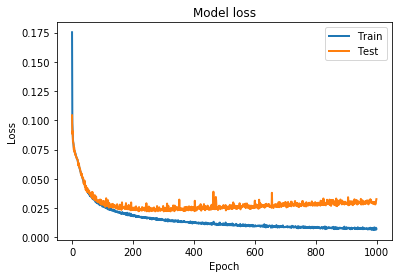

In [15]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

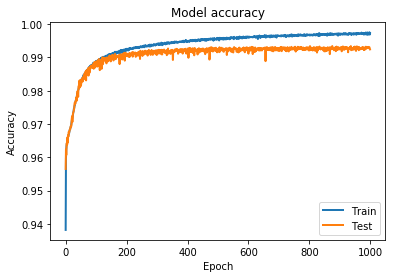

In [16]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [17]:
preds = model.predict(X_test)

In [18]:
preds

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
preds[preds>=0.5]=1
preds[preds<0.5]=0
class_labels = np.argmax(preds, axis=1)

In [20]:
class_labels

array([1, 3, 1, ..., 7, 1, 0])

In [21]:
Y_test.shape

(32444,)

In [22]:
cm = confusion_matrix(y_target=Y_test, y_predicted=class_labels, binary=False)

In [23]:
cm

array([[3200,    0,    0,    0,    0,  162,  109,    6,    0,   17],
       [   2, 3153,    0,    4,    0,    0,    0,    0,    0,    0],
       [   1,    0, 3457,    0,    0,    0,    0,    0,    0,    0],
       [   2,    1,    0, 3243,    0,    0,    1,    0,    0,    0],
       [   4,    0,    0,    0, 3026,    0,    0,    0,    0,    0],
       [ 228,    1,    0,    0,    0, 3147,  224,    6,    0,   18],
       [ 171,    1,    0,    0,    0,  185, 2849,    0,    0,   12],
       [  25,    0,    0,    0,    0,    9,    6, 3034,    0,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0, 3116,    0],
       [  52,    0,    0,    0,    0,   19,   19,    2,    0, 2930]])